In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base

MAX_LEN = 12
MARKET_SIZE = 3
FONT_SIZE = 9

In [2]:
def get_reformulation_target_ranks():
    grouped_users = base.get_dataset_and_group_by_user()

    success = [pd.DataFrame() for i in range(MAX_LEN)]
    fail = [pd.DataFrame() for i in range(MAX_LEN)]

    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            text_formulations = target_group[target_group['type'] == 'text'].reset_index(drop=True)
            if text_formulations.shape[0] <= 0 or text_formulations.shape[0] >= MAX_LEN:
                continue
            if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                fail[len(text_formulations)] = fail[len(text_formulations)].append(text_formulations['target_rank'].sort_index(ascending=True).reset_index(drop=True),ignore_index=True)
            else:
                success[len(text_formulations)] = success[len(text_formulations)].append(text_formulations['target_rank'].sort_index(ascending=True).reset_index(drop=True),ignore_index=True)
    return success, fail

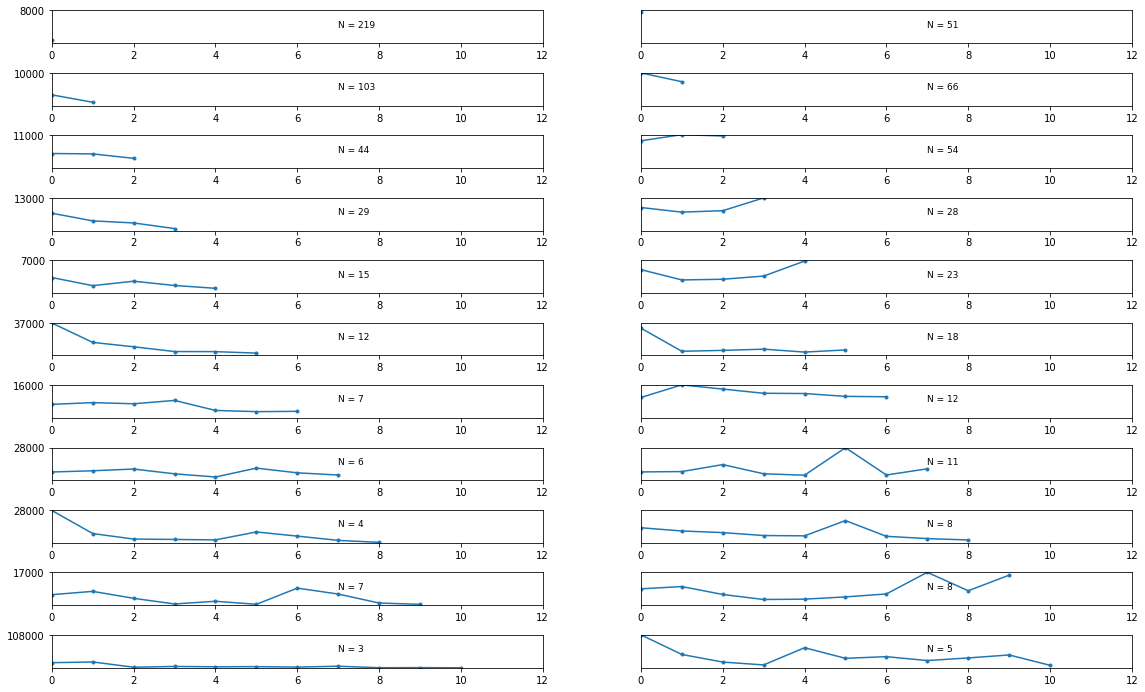

<Figure size 1440x1440 with 0 Axes>

In [3]:
%matplotlib inline
fig, ax = plt.subplots()

success, fail = get_reformulation_target_ranks()
for i in range(MAX_LEN):
    if i == 0:
        continue
    success_pd1 = pd.DataFrame(success[i])
    fail_pd1 = pd.DataFrame(fail[i])
    success_pd = success_pd1.median(axis=0)
    fail_pd = fail_pd1.median(axis=0)
    if success_pd.shape[0] > 0:
        succ_max = success_pd.replace([np.inf, -np.inf], np.nan).dropna().max()
    else:
        succ_max = 0
    if fail_pd.shape[0] > 0:
        fail_max = fail_pd.replace([np.inf, -np.inf], np.nan).dropna().max()
    else:
        fail_max = 0
    YLIM = round(max(succ_max,fail_max), -3)
    if success_pd.shape[0] > 0:
        plt.subplot(MAX_LEN, 2, (2*i) - 1)
        plt.xlim(0, MAX_LEN)
        plt.ylim(0, YLIM)
        plt.yticks([YLIM])
        plt.annotate(("N = " + str(success_pd1.shape[0])), xy=(MAX_LEN - 5,YLIM/2), size=FONT_SIZE)
        plt.plot(success_pd.transpose(),linestyle='solid', marker='o', markersize=MARKET_SIZE)
    if fail_pd.shape[0] > 0:
        plt.subplot(MAX_LEN, 2, (2*i))
        plt.xlim(0, MAX_LEN)
        plt.ylim(0, YLIM)
        plt.yticks([], [])
        plt.annotate(("N = " + str(fail_pd1.shape[0])), xy=(MAX_LEN - 5,YLIM/2), size=FONT_SIZE)
        plt.plot(fail_pd.transpose(), linestyle='solid', marker='o', markersize=MARKET_SIZE)

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5, 0.2,0.9) # make plots bigger in Jupyter

plt.show()
# In every row, Y-axis is the same for both right and left

# N = how much data we aggregated for the plot

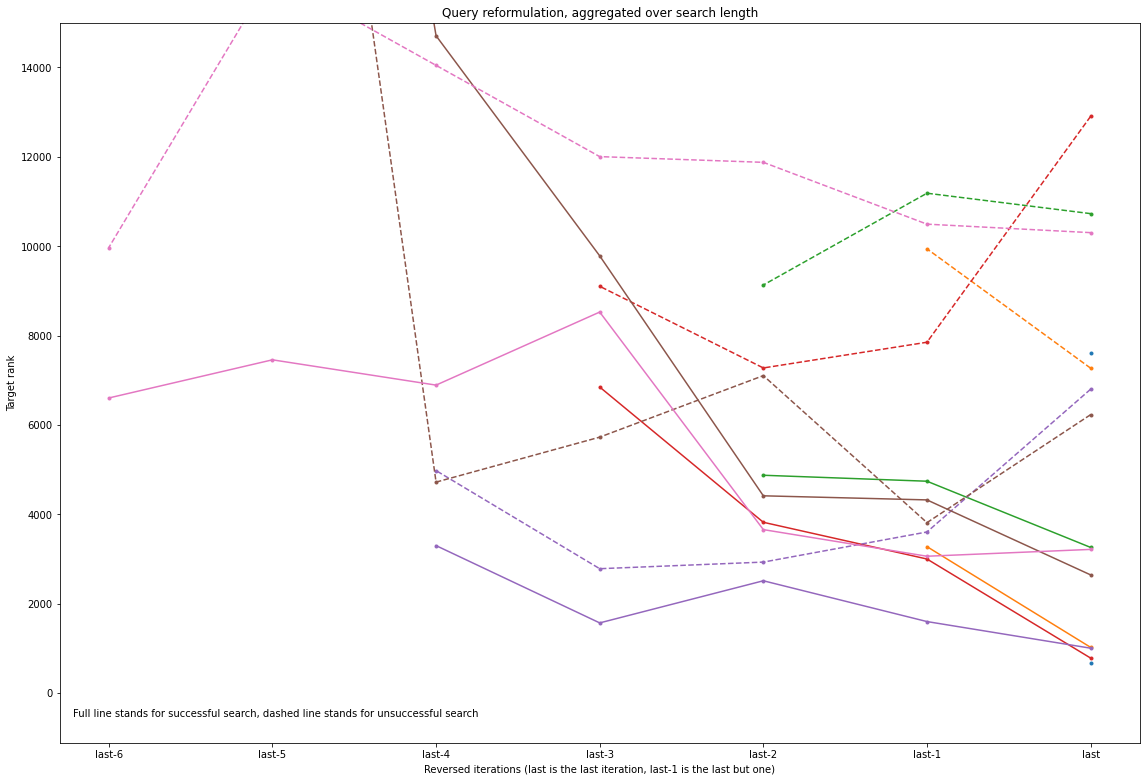

<Figure size 1440x1440 with 0 Axes>

In [4]:
MAX_LEN = 8
MARKET_SIZE = 3
FONT_SIZE = 9

%matplotlib inline
fig, ax = plt.subplots()

success, fail = get_reformulation_target_ranks()
for i in range(MAX_LEN):
    if i == 0:
        continue
    success_pd1 = pd.DataFrame(success[i])
    fail_pd1 = pd.DataFrame(fail[i])
    success_pd = success_pd1.median(axis=0)
    fail_pd = fail_pd1.median(axis=0)
    if success_pd.shape[0] > 0:
        succ_max = success_pd.replace([np.inf, -np.inf], np.nan).dropna().max()
    else:
        succ_max = 0
    if fail_pd.shape[0] > 0:
        fail_max = fail_pd.replace([np.inf, -np.inf], np.nan).dropna().max()
    else:
        fail_max = 0
    YLIM = max(succ_max,fail_max)
    line = plt.plot(success_pd[::-1].reset_index()[0],linestyle='solid', marker='o', markersize=MARKET_SIZE)
    plt.plot(fail_pd[::-1].reset_index()[0], linestyle='dashed',color=line[0].get_color(), marker='o', markersize=MARKET_SIZE)

plt.xlabel('Reversed iterations (last is the last iteration, last-1 is the last but one)')
plt.xticks(list(range(MAX_LEN - 1)), list(['last'] + ["last-" + str(i) for i in range(1, MAX_LEN - 1)]))

plt.ylim(ymax=15000)
plt.figtext(0.5, 0.1, 'Full line stands for successful search, dashed line stands for unsuccessful search',
            ha='center', va='center')
plt.title("Query reformulation, aggregated over search length")
plt.ylabel('Target rank')
plt.gca().invert_xaxis()

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [5]:
def get_reformulation_target_ranks_and_aggregate_over_display_type():
    grouped_users = base.get_dataset_and_group_by_user()
    success_som, fail_som, success_top, fail_top = [], [], [], []
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            text_formulations = target_group[target_group['type'] == 'text'].reset_index(drop=True)
            if text_formulations.shape[0] < 2:
                continue
            if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                if target_group.iloc[0]["display_type"] == "top":
                    fail_top.append(text_formulations['target_rank'].sort_index(ascending=False).reset_index(drop=True))
                else:
                    fail_som.append(text_formulations['target_rank'].sort_index(ascending=False).reset_index(drop=True))

            else:
                if target_group.iloc[0]["display_type"] == "top":
                    success_top.append(text_formulations['target_rank'].sort_index(ascending=False).reset_index(drop=True))
                else:
                    success_som.append(text_formulations['target_rank'].sort_index(ascending=False).reset_index(drop=True))
    return success_som, fail_som, success_top, fail_top


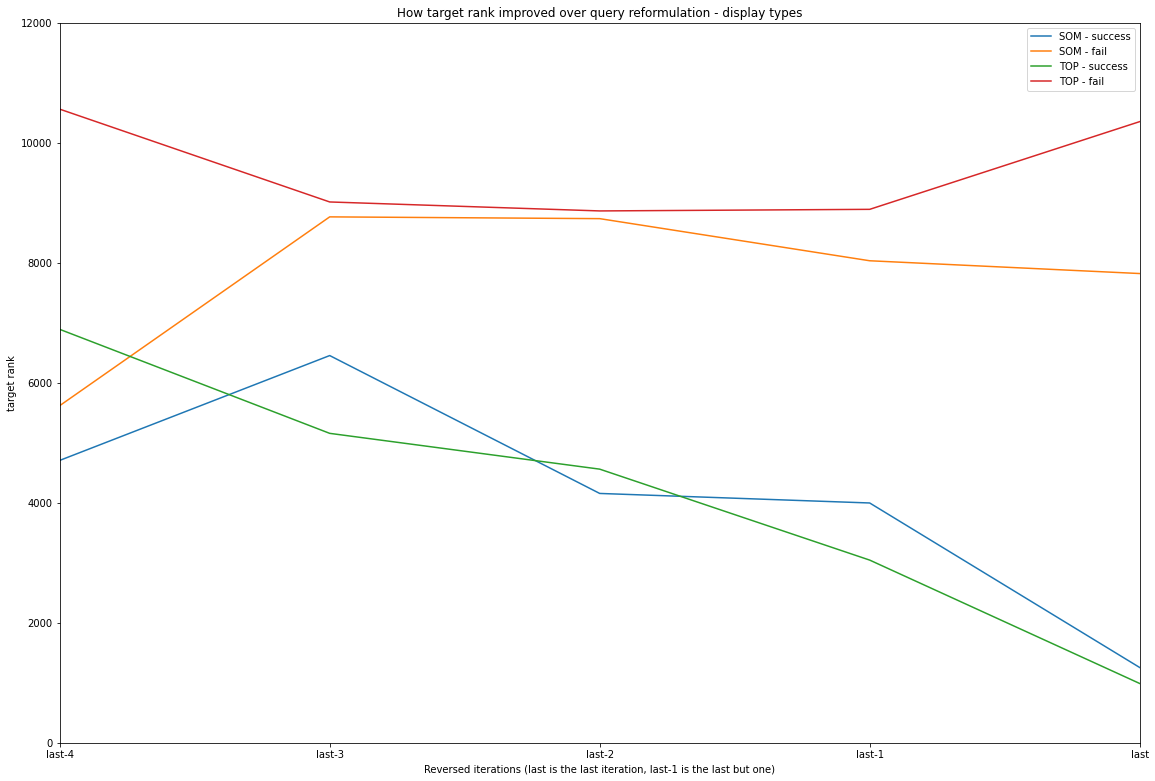

<Figure size 1440x1440 with 0 Axes>

In [6]:
%matplotlib inline
fig, ax = plt.subplots()
XMAX = 5
YMAX = 12000

success_som, fail_som, success_top, fail_top = get_reformulation_target_ranks_and_aggregate_over_display_type()
success_som_df = pd.DataFrame(success_som).median(axis=0)[:XMAX].sort_index(ascending=False).reset_index(drop=True)
fail_som_df = pd.DataFrame(fail_som).median(axis=0)[:XMAX].sort_index(ascending=False).reset_index(drop=True)

success_top_df = pd.DataFrame(success_top).median(axis=0)[:XMAX].sort_index(ascending=False).reset_index(drop=True)
fail_top_df = pd.DataFrame(fail_top).median(axis=0)[:XMAX].sort_index(ascending=False).reset_index(drop=True)

plt.xlim(xmax=XMAX-1)
plt.ylim(ymax=YMAX)
success_som_df.plot.line(label="SOM - success")
fail_som_df.plot.line(label="SOM - fail")
success_top_df.plot.line(label="TOP - success")
fail_top_df.plot.line(label="TOP - fail")
plt.legend(loc="upper right")
plt.title("How target rank improved over query reformulation - display types")
plt.xlabel('Reversed iterations (last is the last iteration, last-1 is the last but one)')
plt.ylabel('target rank')
plt.xticks(list(range(XMAX)), reversed(list(['last'] + ["last-" + str(i) for i in range(1, XMAX)])))

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [7]:
# let's try to aggregate display types

In [8]:
def get_reformulation_target_ranks_and_aggregate_over_success():
    grouped_users = base.get_dataset_and_group_by_user()
    success = []
    fail = []
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            text_formulations = target_group[target_group['type'] == 'text'].reset_index(drop=True)
            if text_formulations.shape[0] < 2:
                continue
            if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                fail.append(text_formulations['target_rank'].sort_index(ascending=False).reset_index(drop=True))
            else:
                success.append(text_formulations['target_rank'].sort_index(ascending=False).reset_index(drop=True))
    return success, fail

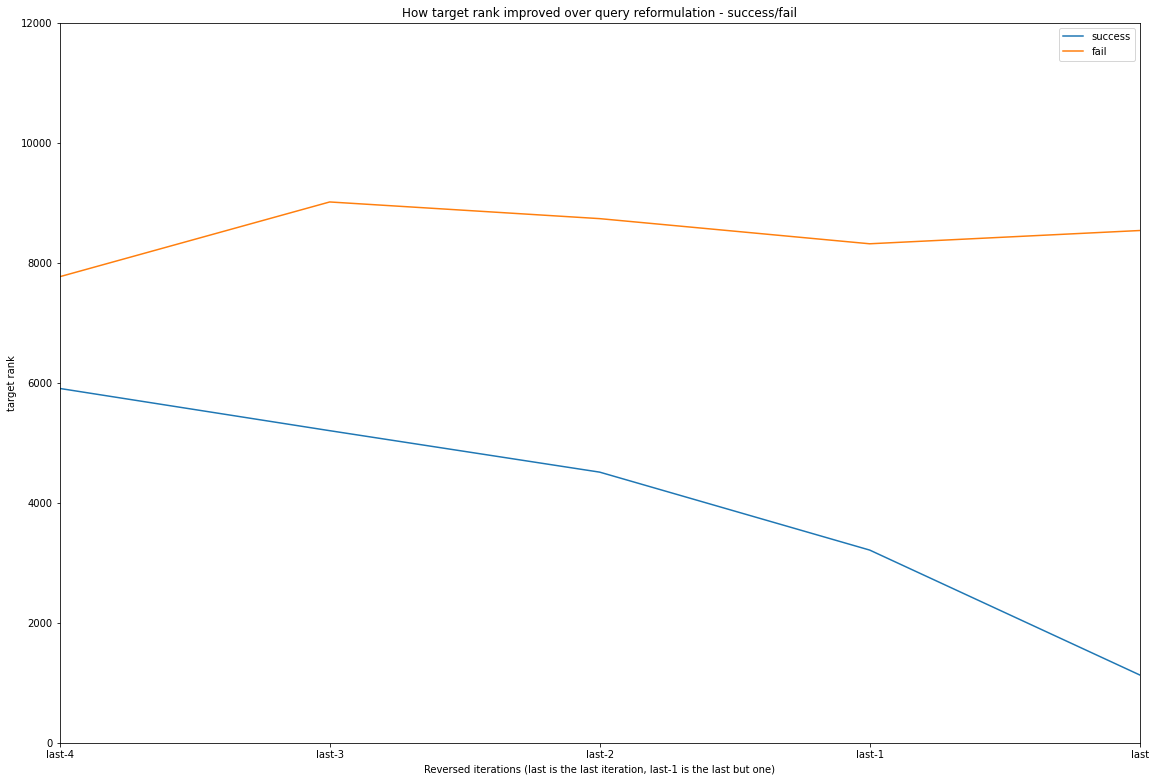

<Figure size 1440x1440 with 0 Axes>

In [9]:
%matplotlib inline
fig, ax = plt.subplots()

success, fail = get_reformulation_target_ranks_and_aggregate_over_success()
success_df = pd.DataFrame(success).median(axis=0)[:XMAX]
fail_df = pd.DataFrame(fail).median(axis=0)[:XMAX]

plt.xlim(xmax=XMAX - 1)
plt.ylim(ymax=YMAX)
plt.gca().invert_xaxis()
success_df.plot.line(label="success")
fail_df.plot.line(label="fail")
plt.legend(loc="upper right")
plt.xticks(range(XMAX), ["last"] + ["last-" + str(i) for i in range(1,XMAX)])
plt.title("How target rank improved over query reformulation - success/fail")
plt.xlabel('Reversed iterations (last is the last iteration, last-1 is the last but one)')
plt.ylabel('target rank')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [10]:
# Let's also take a look on quantiles! There might be some interesting info too!

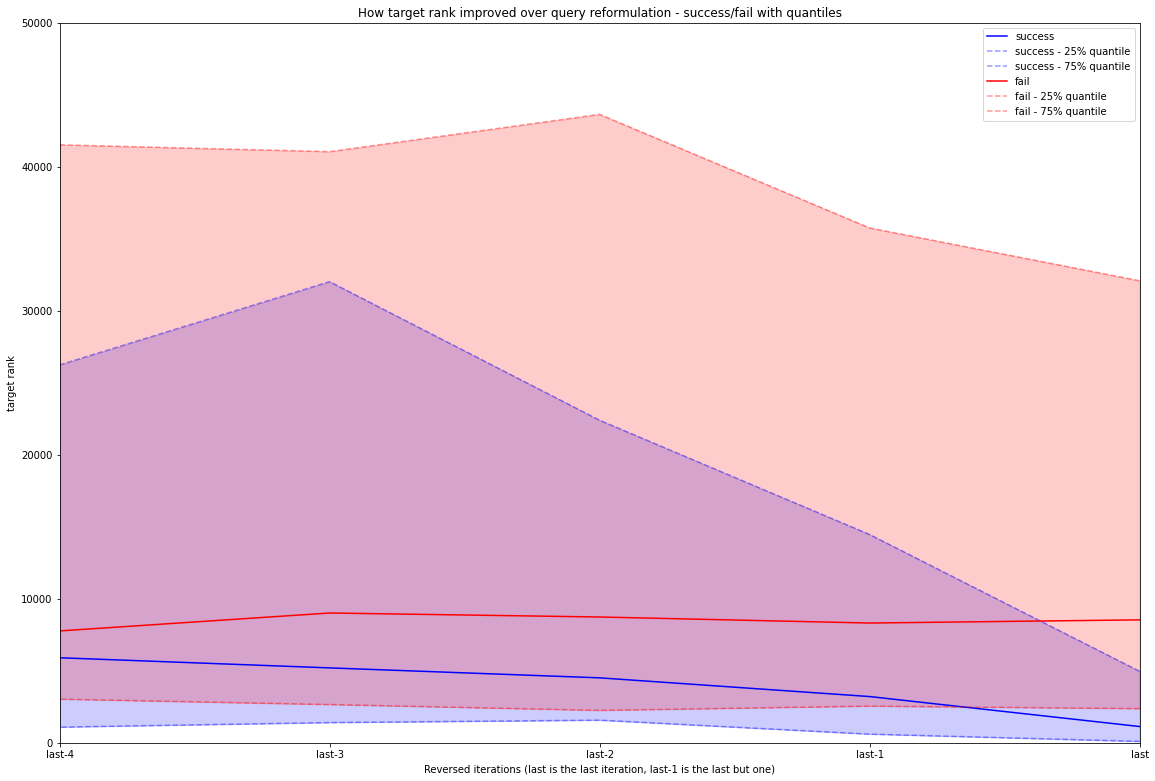

<Figure size 1440x1440 with 0 Axes>

In [13]:
%matplotlib inline
fig, ax = plt.subplots()

success, fail = get_reformulation_target_ranks_and_aggregate_over_success()

success_df = pd.DataFrame(success).median(axis=0)[:XMAX]
success_75df = pd.DataFrame(success).quantile(.75, axis=0)[:XMAX]
success_25df = pd.DataFrame(success).quantile(.25, axis=0)[:XMAX]

fail_df = pd.DataFrame(fail).median(axis=0)[:XMAX]
fail_75df = pd.DataFrame(fail).quantile(.75, axis=0)[:XMAX]
fail_25df = pd.DataFrame(fail).quantile(.25, axis=0)[:XMAX]

plt.xlim(xmax=XMAX - 1)
plt.ylim(ymax=15000)
plt.gca().invert_xaxis()
success_df.plot.line(label="success", color='blue')
y1 = success_25df.plot.line(label="success - 25% quantile", linestyle='--', alpha=0.4, color='blue')
y2 = success_75df.plot.line(label="success - 75% quantile", linestyle='--', alpha=0.4, color='blue')

plt.fill_between(x=list(range(XMAX)), y1=success_25df.to_list(), y2=success_75df.to_list(), alpha=0.2, color='blue')

fail_df.plot.line(label="fail", color='red')
fail_25df.plot.line(label="fail - 25% quantile", linestyle='--', alpha=0.4, color='red')
fail_75df.plot.line(label="fail - 75% quantile", linestyle='--', alpha=0.4, color='red')
plt.fill_between(x=list(range(XMAX)), y1=fail_25df.to_list(), y2=fail_75df.to_list(), alpha=0.2, color='red')

plt.legend(loc="upper right")
plt.xticks(range(XMAX), ["last"] + ["last-" + str(i) for i in range(1,XMAX)])
plt.ylim(ymax=50000)
plt.title("How target rank improved over query reformulation - success/fail with quantiles")
plt.xlabel('Reversed iterations (last is the last iteration, last-1 is the last but one)')
plt.ylabel('target rank')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()